### Weekly
This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [1]:
from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os.path
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)
pd.set_option('display.width', 160)
pd.set_option('precision', 4)

In [2]:
load_app_config()
DIRECTORY="islr"
FILENAME ='weekly.csv'
RESPONSE="Direction"
input_path = get_datafolder_path()

{'DEV': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'UAT': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'REG': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'PRD': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}}
Adding F:\MachineLearning  to system path
Adding F:\DataSource  to system path


In [3]:
def load_dataset(filename=FILENAME,response=RESPONSE):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = load_data(input_file)
    print(" input file is :{0} loaded.".format(input_file))
    #print(input_dataset.head())
    
    try:
        continuous_vars = input_dataset.describe().columns
        print("Continous Variables")
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns
        print("Categorical Variables")
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
        categorical_vars = None
    
    response_column =  [col for col in input_dataset.columns if response in col]
    feature_columns =  [col for col in input_dataset.columns if response not in col]
            
    
    return  input_dataset,feature_columns,response_column

In [4]:
input_dataset,feature_columns,response_column = load_dataset(filename=FILENAME,response=RESPONSE)
X = input_dataset[feature_columns]
y = input_dataset[response_column]

 input file is :F:\DataSource\islr\weekly.csv loaded.
Continous Variables
Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today'], dtype='object')
Categorical Variables
Index(['Direction'], dtype='object')


In [5]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*40,"feature columns"))
    print(feature_columns)
    print("<{0} {1} {0}>".format("="*40,"data header"))
    #print(X.head().to_string())
    print("<{0} {1} {0}>".format("="*40,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -X"))
    print(X.describe())
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -y"))
    print(y.describe())
    print("<{0} {1} {0}>".format("="*40,"value_count -y"))
    print(y.groupby(response_column)[response_column].count())

#### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [6]:
display_data_descriptives(input_dataset,X,feature_columns,y,response_column)

<======================================== feature columns ========================================>
['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']
<======================================== data header ========================================>
<======================================== response ========================================>
['Direction']
<======================================== Descriptive Statistics -X ========================================>
            Year       Lag1       Lag2       Lag3       Lag4       Lag5     Volume      Today
count  1089.0000  1089.0000  1089.0000  1089.0000  1089.0000  1089.0000  1089.0000  1089.0000
mean   2000.0487     0.1506     0.1511     0.1472     0.1458     0.1399     1.5746     0.1499
std       6.0332     2.3570     2.3573     2.3605     2.3603     2.3613     1.6866     2.3569
min    1990.0000   -18.1950   -18.1950   -18.1950   -18.1950   -18.1950     0.0875   -18.1950
25%    1995.0000    -1.1540    -1.1540    -1.1580

In [7]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
input_dataset[response_column] = class_le.fit_transform(input_dataset[response_column].values.ravel())
input_dataset[response_column].head(5)

,Direction
0,0
1,0
2,1
3,1
4,1


In [8]:
def plot_hist(input_dataset,feature_columns,response_column,nbins=10):
    all_features = feature_columns
    fig = plt.figure(figsize=(16,20))
    rows,col = input_dataset.shape
    pal = sns.color_palette("colorblind",len(all_features))
    colors =pal.as_hex()
    for i in range(col-1):
        ax = fig.add_subplot(4, 4, i+1)
        #ax.hist(input_dataset[all_columns[i]], bins=10, histtype='stepfilled')
        sns.distplot(input_dataset[all_features[i]],ax=ax,kde=False,color =colors[i],norm_hist =True,hist_kws=dict(alpha=1))
        ax.set_title(all_features[i])
    plt.tight_layout()

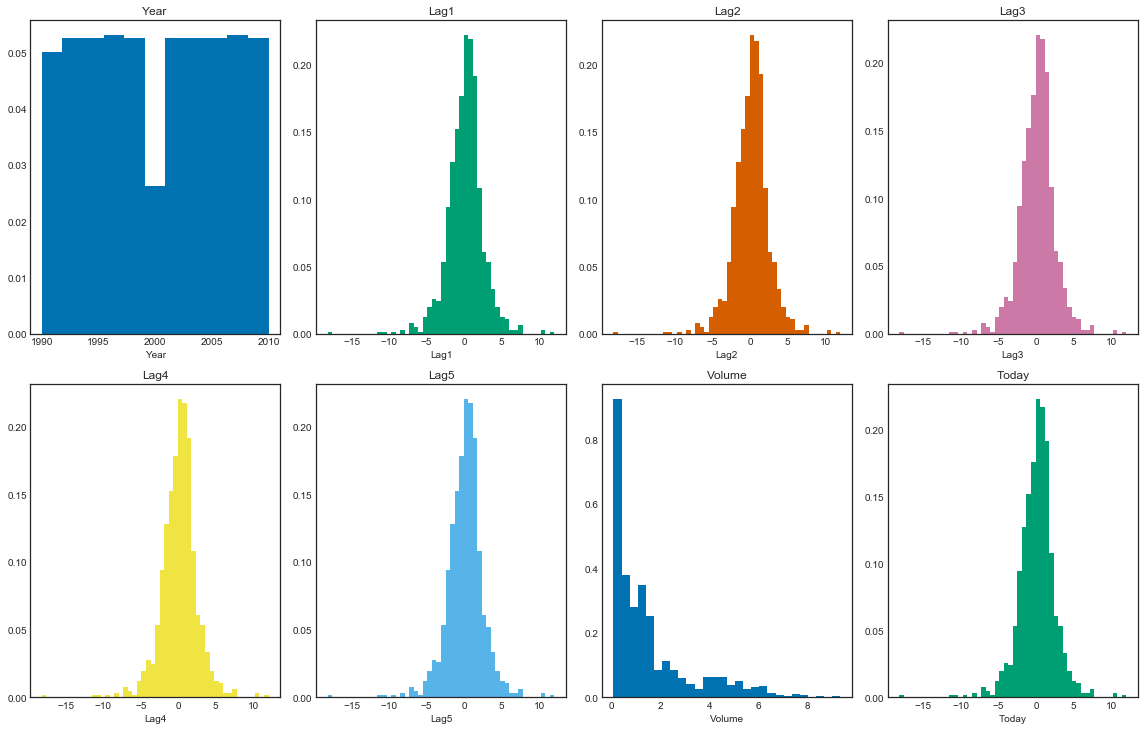

In [9]:
sns.set_style('white',{'axes.grid' : False})   
plot_hist(input_dataset,feature_columns,response_column,25)

In [10]:
def plot_scatter(input_dataset,feature_columns,response_column):
    all_features = feature_columns
    fig = plt.figure(figsize=(20,30))
    rows,col = input_dataset.shape
    pal = sns.color_palette("colorblind",len(all_features))
    colors =pal.as_hex()
    for i in range(col-1):
        ax = fig.add_subplot(4, 4, i+1)
        ax.scatter(input_dataset[all_features[i]],input_dataset[response_column])
        #sns.stripplot(x=all_features[i], y= response_column[0], data=input_dataset, size=4,jitter=True ,ax=ax)
        ax.set_title(all_features[i])
    plt.tight_layout()
    

In [11]:
#plot_scatter(input_dataset,feature_columns,response_column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
Year         1089 non-null int64
Lag1         1089 non-null float64
Lag2         1089 non-null float64
Lag3         1089 non-null float64
Lag4         1089 non-null float64
Lag5         1089 non-null float64
Volume       1089 non-null float64
Today        1089 non-null float64
Direction    1089 non-null int64
dtypes: float64(7), int64(2)
memory usage: 76.6 KB


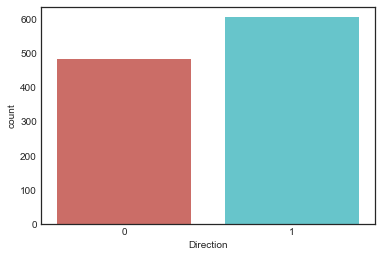

In [12]:
input_dataset.head(5)
input_dataset.info()
sns.countplot(x=response_column[0],data=input_dataset, palette='hls')
plt.show()

In [13]:
def plot_box(input_dataset,feature_columns,response_column):
    all_features = feature_columns
    fig = plt.figure(figsize=(20,30))
    rows,col = input_dataset.shape
    pal = sns.color_palette("colorblind",len(all_features))
    colors =pal.as_hex()
    for i in range(col-1):
        ax = fig.add_subplot(4, 4, i+1)
        #ax.scatter(input_dataset[all_features[i]],input_dataset[response_column])
        #sns.stripplot(x=all_features[i], y= response_column[0], data=input_dataset, size=4,jitter=True ,ax=ax)
        sns.boxplot(x=response_column[0] , y=all_features[i], data=input_dataset)
        ax.set_title(all_features[i])
    plt.tight_layout()
    

In [14]:
#plot_box(input_dataset,feature_columns,response_column) 

In [15]:
input_dataset['Str_Direction'] = class_le.inverse_transform(input_dataset[response_column].values.ravel())

In [16]:
def plot_bar(input_dataset,feature_columns):
    all_features = feature_columns
    fig = plt.figure(figsize=(20,30))
    rows,col = input_dataset[all_features].shape
    pal = sns.color_palette("colorblind",len(all_features))
    colors =pal.as_hex()
    for i in range(col-1):
        ax = fig.add_subplot(4, 4, i+1)
        sns.barplot(input_dataset['Str_Direction'],input_dataset[all_features[i]])
        ax.set_title(all_features[i])
    plt.tight_layout()

In [17]:
#plot_bar(input_dataset,feature_columns)

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so,which ones?

In [18]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection  import  train_test_split
from sklearn.linear_model  import LogisticRegression

def evaluvate_pipeline(X_train,y_train,model,model_name):
    
    # create pipeline
    estimators =[]
    estimators.append(('standardize', StandardScaler()))
    estimators.append((model_name, model))
    pipeline = Pipeline(estimators)
    # evaluate pipeline
    kfold = KFold(n_splits=10, random_state=7)
    scores = cross_val_score(pipeline, X_train, y_train, cv=kfold)
    
    return scores,pipeline


In [19]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)),"\n" )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),"\n")
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)),"\n")
    return y_pred

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

from matplotlib import style

style.use('seaborn-colorblind')

def plot_roc(y_test, y_pred):
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    fig = plt.figure(figsize=(6,4))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    roc_auc_score(y_test, y_pred)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 6 columns):
Lag1      1089 non-null float64
Lag2      1089 non-null float64
Lag3      1089 non-null float64
Lag4      1089 non-null float64
Lag5      1089 non-null float64
Volume    1089 non-null float64
dtypes: float64(6)
memory usage: 51.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 1 columns):
Direction    1089 non-null int64
dtypes: int64(1)
memory usage: 8.6 KB
None
   Direction
0          0
1          0
2          1
3          1
4          1
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.538039415562
Accuracy:0.561 

Classification report
             precision    recall  f1-score   support

          0       0.53 

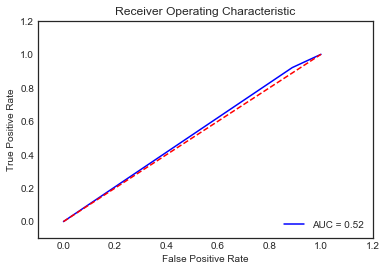

(1089, 1)


In [21]:
test_size = 0.17
seed = 1
feature_columns=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
X = input_dataset[feature_columns]
y = input_dataset[response_column]
print(X.info())
print(y.info())
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=seed)
model =LogisticRegression()
print(model)
scores,pipeline = evaluvate_pipeline(X,y.values.ravel(),model,'log_reg')

print(scores.mean())

pipeline.fit(X,y.values.ravel())

y_pred = measure_performance(X,y,pipeline, show_accuracy=True, 
                             show_classification_report=True,
                             show_confusion_matrix=True, show_r2_score=False)
plot_roc(y, y_pred)
print(y.shape)

In [22]:
import statsmodels.api as sm

#smodel = sm.Logit(y.values.ravel(),X.values).fit()
#smodel.summary()


F:\Anaconda2\envs\machinelearning\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
input_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 10 columns):
Year             1089 non-null int64
Lag1             1089 non-null float64
Lag2             1089 non-null float64
Lag3             1089 non-null float64
Lag4             1089 non-null float64
Lag5             1089 non-null float64
Volume           1089 non-null float64
Today            1089 non-null float64
Direction        1089 non-null int64
Str_Direction    1089 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 85.2+ KB


###### Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute theconfusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [28]:
training_set = input_dataset[ (input_dataset['Year'] >= 1990) & (input_dataset['Year'] <= 2008) ]
testing_set =input_dataset[(input_dataset['Year'] > 2008)]

X_train = training_set['Lag5']
X_test = testing_set['Lag5']
y_train = training_set[response_column]
y_test =  testing_set[response_column]


In [29]:
X_train.head(5)
print(y_train.shape)

(985, 1)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy:0.558 

Classification report
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        43
          1       0.57      0.95      0.72        61

avg / total       0.34      0.56      0.42       104
 

Confusion matrix
[[ 0 43]
 [ 3 58]] 



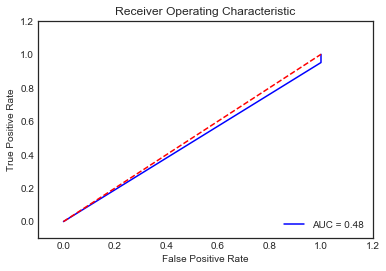

In [41]:
model =LogisticRegression(solver ='newton-cg',fit_intercept=False)
print(model)

pipeline.fit(X_train.values.reshape(-1, 1),y_train.values.ravel())
y_pred = pipeline.predict(X_test.values.reshape(-1, 1))

y_pred = measure_performance(X_test.values.reshape(-1, 1),y_test.values.ravel(),pipeline, show_accuracy=True, 
                            show_classification_report=True,
                           show_confusion_matrix=True, show_r2_score=False)
plot_roc(y_test, y_pred)
 